# 计算龙头

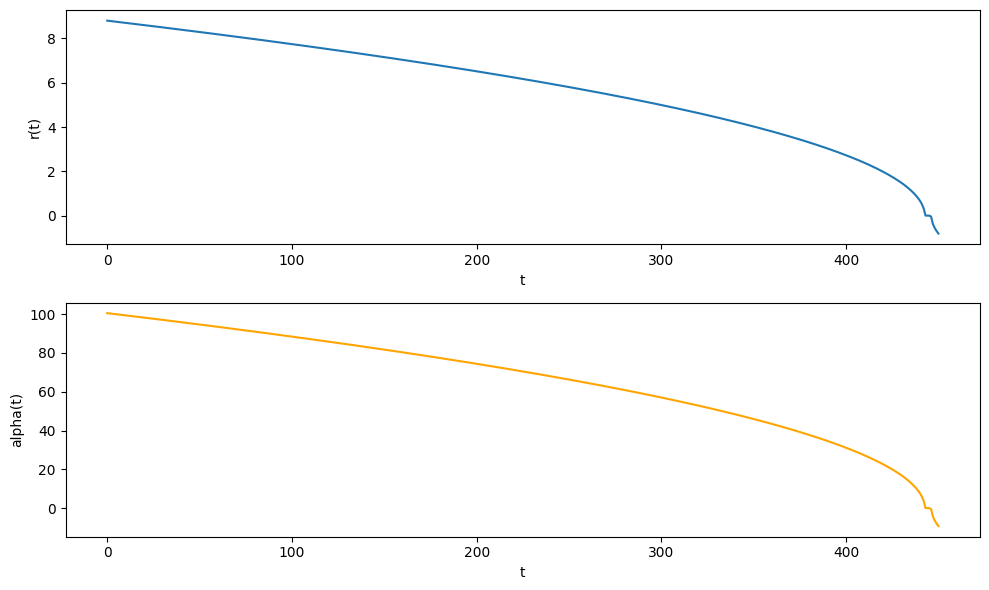

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义常量
l = 0.55  # l 的值
pi = np.pi

# 定义微分方程
def system(t, y):
    r, alpha = y
    # 方程1中的 d(alpha)/dt
    dalpha_dt = - np.sqrt(1 / (r**2 * (1 + (l**2) / (4 * pi**2 * r**2))**2))
    # 方程2中的 d(r)/dt
    dr_dt = l * dalpha_dt / (2 * pi)
    return [dr_dt, dalpha_dt]

# 初始条件
r0 = l * 16
alpha0 = 32 * pi
y0 = [r0, alpha0]

# 时间范围
t_span = [0,450]  # 从 t=0 到 t=10
t_eval = np.linspace(t_span[0], t_span[1], 451)

# 求解微分方程
sol = solve_ivp(system, t_span, y0, t_eval=t_eval)

# 提取结果
r_sol = sol.y[0]
alpha_sol = sol.y[1]
t_sol = sol.t

# 绘制 r(t) 和 alpha(t) 的关系图
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_sol, r_sol, label='r(t)')
# plt.title('Solution of r(t) and alpha(t)')
plt.xlabel('t')
plt.ylabel('r(t)')
# plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_sol, alpha_sol, label='alpha(t)', color='orange')
plt.xlabel('t')
plt.ylabel('alpha(t)')
# plt.grid(True)

plt.tight_layout()
plt.show()

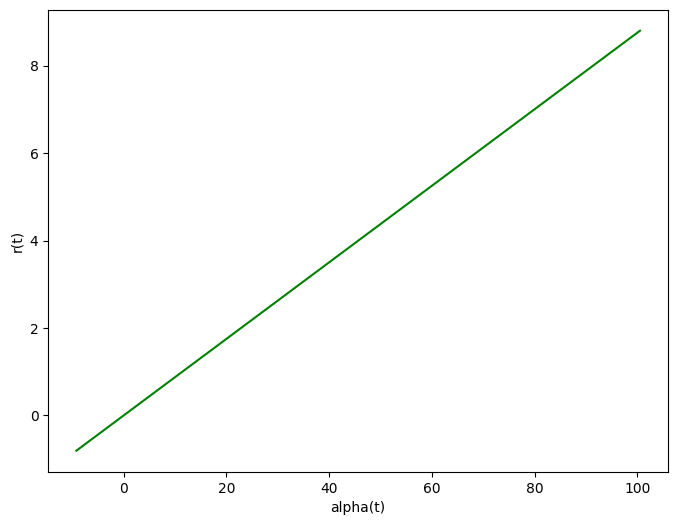

In [2]:
# 绘制 r(t) 与 alpha(t) 的关系图
plt.figure(figsize=(8, 6))
plt.plot(alpha_sol, r_sol, label='r(α)', color='green')
# plt.title('Relationship between r(t) and alpha(t)')
plt.xlabel('alpha(t)')
plt.ylabel('r(t)')
# plt.grid(True)
plt.show()

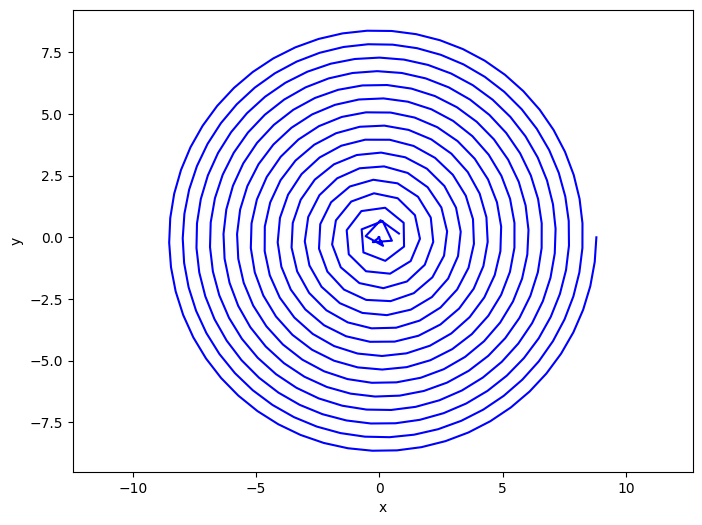

In [3]:
# 绘制 x = r*cos(alpha) 和 y = r*sin(alpha) 的图像
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Trajectory (x, y)', color='blue')
# plt.title('Trajectory in Cartesian Coordinates')
plt.xlabel('x')
plt.ylabel('y')
# plt.grid(True)
plt.axis('equal')  # 确保比例尺相同
plt.show()

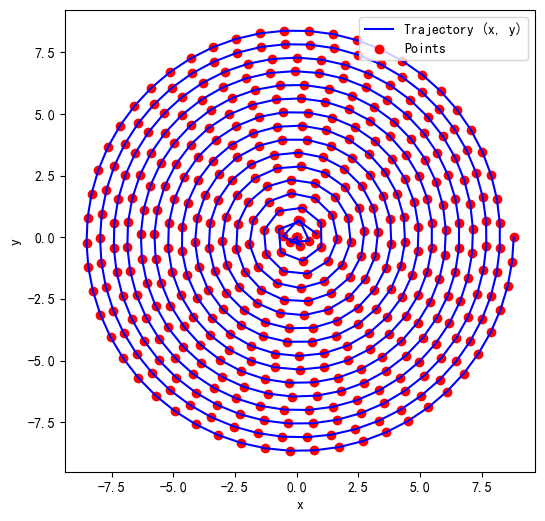

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 将极坐标转换为笛卡尔坐标
x = r_sol * np.cos(alpha_sol)
y = r_sol * np.sin(alpha_sol)

plt.figure(figsize=(8, 6))

# 绘制轨迹
plt.plot(x, y, label='Trajectory (x, y)', color='blue')

# 绘制点
plt.scatter(x, y, color='red', marker='o', label='Points')

# 图形设置
# plt.title('等距螺线及其上的点')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
# plt.grid(True)
plt.legend()
plt.show()

In [5]:
points_values = pd.DataFrame()
points_values["龙头坐标"]=list(zip(x, y))
points_x = pd.DataFrame()
points_x["龙头坐标x"] = x
points_y = pd.DataFrame()
points_y["龙头坐标y"] = y

In [6]:
points_values

,龙头坐标
0,"(8.8, -3.448605386398947e-14)"
1,"(8.733302426176627, -0.9971838526706541)"
2,"(8.55383611837242, -1.9803488343056626)"
3,"(8.263798145156374, -2.936746676774618)"
4,"(7.866828261599743, -3.8539331794340654)"
...,...
446,"(-0.03490256999549414, 0.01646925688556964)"
447,"(0.1506967453928268, -0.3449689153905976)"
448,"(-0.5553329681281366, 0.04600768862286307)"
449,"(0.04635828620382936, 0.6918055210892928)"


In [7]:
import pandas as pd
# 创建 DataFrame
points = pd.DataFrame({
    't':t_eval, 
    'r': sol.y[0],
    'alpha_龙头': sol.y[1],
})

In [8]:
points

,t,r,alpha_龙头
0,0.0,8.800000,100.530965
1,1.0,8.790048,100.417276
2,2.0,8.780085,100.303457
3,3.0,8.770111,100.189510
4,4.0,8.760125,100.075433
...,...,...,...
446,446.0,-0.038593,-0.440886
447,447.0,-0.376448,-4.300531
448,448.0,-0.557236,-6.365844
449,449.0,-0.693357,-7.920892


# 计算第二节点

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题
def plot_spiral_with_points(point):
    # 等距螺线的参数
    p = 0.55  # 螺距
    b = p / (2 * np.pi)  # b参数由螺距p确定
    a = 0  # 初始半径

    # 生成螺线的角度范围
    theta = np.linspace(0, 2 * np.pi * 16, 1000)  # 从0到16圈

    # 计算螺线半径
    r = a + b * theta

    # 将极坐标转换为笛卡尔坐标
    x_spiral = r * np.cos(theta)
    y_spiral = r * np.sin(theta)

    # 提取点数据
    x_points = []
    y_points = []
    for i, theta_point in point:
        r_point = a + b * theta_point
        x_point = r_point * np.cos(theta_point)
        y_point = r_point * np.sin(theta_point)
        x_points.append(x_point)
        y_points.append(y_point)

    # 绘制螺线
    plt.figure(figsize=(8, 8))
    plt.plot(x_spiral, y_spiral, label="等距螺线")
    
    # 绘制点
    plt.scatter(x_points, y_points, color='red', marker='o', label='点')

    # 图形设置
#     plt.title("等距螺线及其上的点")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal', adjustable='box')
#     plt.grid(True)
    plt.legend()
    plt.show()

# plot_spiral_with_points(point)


def plot_spiral_with_points_noi(point):
    # 等距螺线的参数
    p = 0.55  # 螺距
    b = p / (2 * np.pi)  # b参数由螺距p确定
    a = 0  # 初始半径

    # 生成螺线的角度范围
    theta = np.linspace(0, 2 * np.pi * 16, 1000)  # 从0到16圈

    # 计算螺线半径
    r = a + b * theta

    # 将极坐标转换为笛卡尔坐标
    x_spiral = r * np.cos(theta)
    y_spiral = r * np.sin(theta)

    # 提取点数据
    x_points = []
    y_points = []
    for  theta_point in point:
        r_point = a + b * theta_point
        x_point = r_point * np.cos(theta_point)
        y_point = r_point * np.sin(theta_point)
        x_points.append(x_point)
        y_points.append(y_point)

    # 绘制螺线
    plt.figure(figsize=(8, 8))
    plt.plot(x_spiral, y_spiral, label="等距螺线")
    
    # 绘制点
    plt.scatter(x_points, y_points, color='red', marker='o', label='点')
    plt.plot(x_points, y_points, color='red',linestyle='-', label='龙板凳')
    # 图形设置
#     plt.title("等距螺线及其上的点")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal', adjustable='box')
#     plt.grid(True)
    plt.legend()
    plt.show()

# plot_spiral_with_points(point)

In [10]:
import numpy as np
from scipy.optimize import fsolve

# 螺旋线参数
a = 0  # 初始半径
p = 0.55  # 螺距为 0.55 米
b = p / (2 * np.pi)  # b参数由螺距 p 确定

# 已知弦长公式
def chord_length(theta1, theta2):
    r1 = a + b * theta1
    r2 = a + b * theta2
    return np.sqrt(r1**2 + r2**2 - 2 * r1 * r2 * np.cos(theta2 - theta1))

# 求解下一个角度
def find_next_angle(theta1, L):
    # 目标函数：根据弦长公式求解 theta2，使得弦长等于 L
    def objective(theta2):
        return chord_length(theta1, theta2) - L
    
    # 使用 fsolve 进行数值求解
    theta2_initial_guess = theta1 + 0.0005  # 初始猜测：下一角度在 theta1 之后
    theta2_solution = fsolve(objective, theta2_initial_guess)
    
    return theta2_solution[0]

# # 示例：已知角度 theta1 和弦长 L
# theta1 = 0  # 角度 θ1，单位为弧度
# L = 1  # 弦长，单位为米

# # 求解下一个角度
# theta2 = find_next_angle(theta1, L)
# print(f"下一个点的角度为: {theta2} 弧度")

In [11]:
L_1 = 2.86
L_2 = 1.65

In [12]:
points.columns

Index(['t', 'r', 'alpha_龙头'], dtype='object')

In [13]:
alpha_values = points[["alpha_龙头"]].values
point_1 = [find_next_angle(theta, L_1) for theta in alpha_values]
# point_1

c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [14]:
points["alpha_第1节龙身"] = point_1

In [15]:
points.columns

Index(['t', 'r', 'alpha_龙头', 'alpha_第1节龙身'], dtype='object')

In [16]:
for i in range(222):
    alpha_values = points[[f"alpha_第{i+1}节龙身"]].values
    point_tempt = [find_next_angle(theta, L_2) for theta in alpha_values]
    points[f"alpha_第{i+2}节龙身"] = point_tempt

In [17]:
points.to_excel("龙板凳对应的极坐标角度.xlsx")

In [18]:
points_test = points.drop(['t', 'r'], axis=1)
points_test

,alpha_龙头,alpha_第1节龙身,alpha_第2节龙身,alpha_第3节龙身,alpha_第4节龙身,alpha_第5节龙身,alpha_第6节龙身,alpha_第7节龙身,alpha_第8节龙身,alpha_第9节龙身,...,alpha_第214节龙身,alpha_第215节龙身,alpha_第216节龙身,alpha_第217节龙身,alpha_第218节龙身,alpha_第219节龙身,alpha_第220节龙身,alpha_第221节龙身,alpha_第222节龙身,alpha_第223节龙身
0,100.530965,100.856864,101.043848,101.230486,101.416779,101.602730,101.788340,101.973612,102.158546,102.343146,...,134.945785,135.085505,135.225081,135.364512,135.503800,135.642944,135.781945,135.920804,136.059522,136.198097
1,100.417276,100.743545,100.930740,101.117587,101.304089,101.490247,101.676063,101.861539,102.046677,102.231479,...,134.861167,135.000974,135.140637,135.280155,135.419530,135.558761,135.697849,135.836794,135.975597,136.114258
2,100.303457,100.630099,100.817505,101.004563,101.191273,101.377639,101.563662,101.749343,101.934686,102.119691,...,134.776495,134.916390,135.056141,135.195747,135.335208,135.474526,135.613700,135.752732,135.891621,136.030368
3,100.189510,100.516525,100.704143,100.891411,101.078332,101.264906,101.451136,101.637024,101.822571,102.007780,...,134.691770,134.831754,134.971592,135.111285,135.250834,135.390238,135.529500,135.668617,135.807593,135.946425
4,100.075433,100.402823,100.590654,100.778133,100.965264,101.152047,101.338485,101.524580,101.710333,101.895747,...,134.606992,134.747064,134.886990,135.026771,135.166407,135.305899,135.445247,135.584451,135.723513,135.862432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,-0.440886,32.766027,33.344041,33.911939,34.470239,35.019415,35.559904,36.092109,36.616403,37.133130,...,95.574482,95.771812,95.968734,96.165253,96.361369,96.557085,96.752405,96.947329,97.141862,97.336004
447,-4.300531,31.934303,32.527527,33.109822,33.681776,34.243926,34.796763,35.340741,35.876274,36.403748,...,95.296070,95.493977,95.691473,95.888561,96.085244,96.281523,96.477402,96.672883,96.867968,97.062660
448,-6.365844,-9.766627,-6.870934,-4.113556,-18.279058,-17.158960,-15.949516,-14.623223,-13.133263,-11.383454,...,88.811703,89.024077,89.235944,89.447307,89.658169,89.868536,90.078409,90.287793,90.496691,90.705106
449,-7.920892,23.663065,24.467227,25.244445,25.997303,26.727991,27.438387,28.130118,28.804599,29.463076,...,92.895987,93.099012,93.301595,93.503737,93.705442,93.906712,94.107550,94.307959,94.507941,94.707500


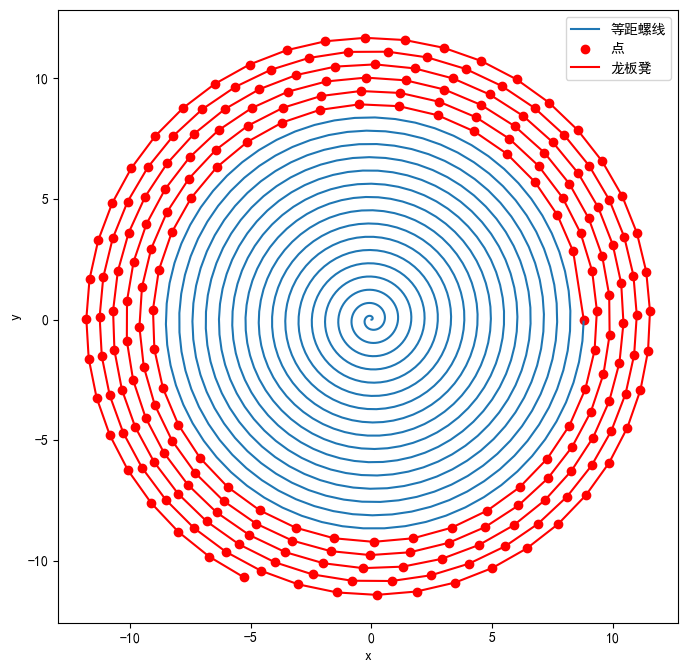

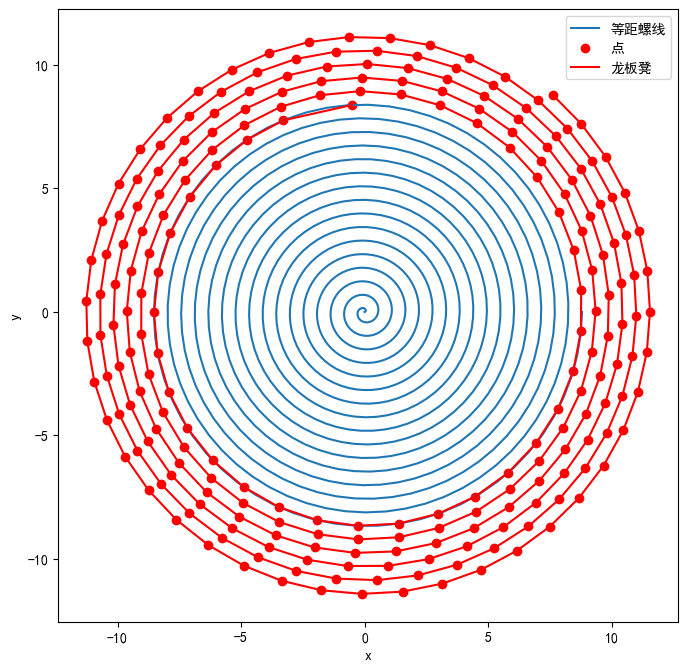

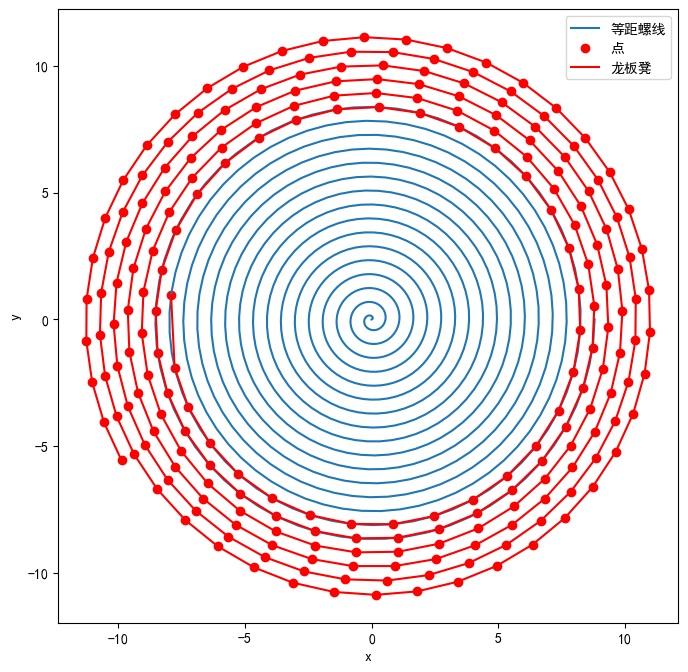

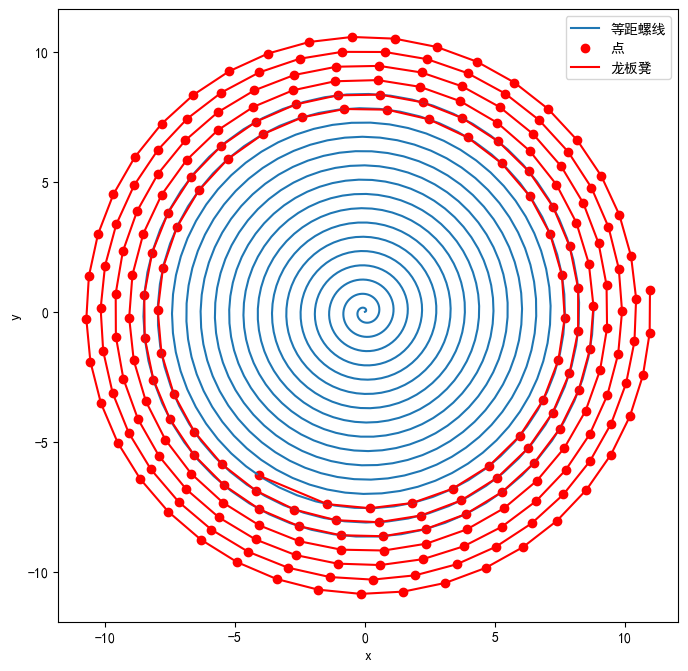

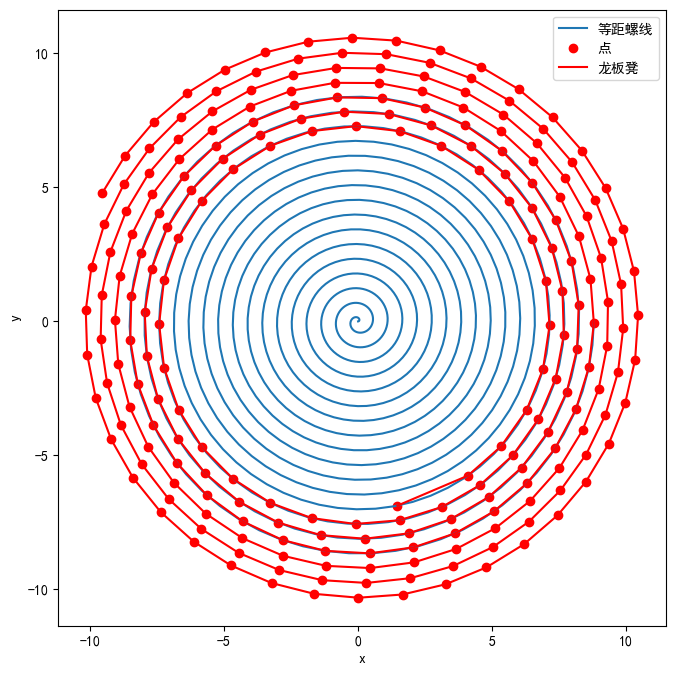

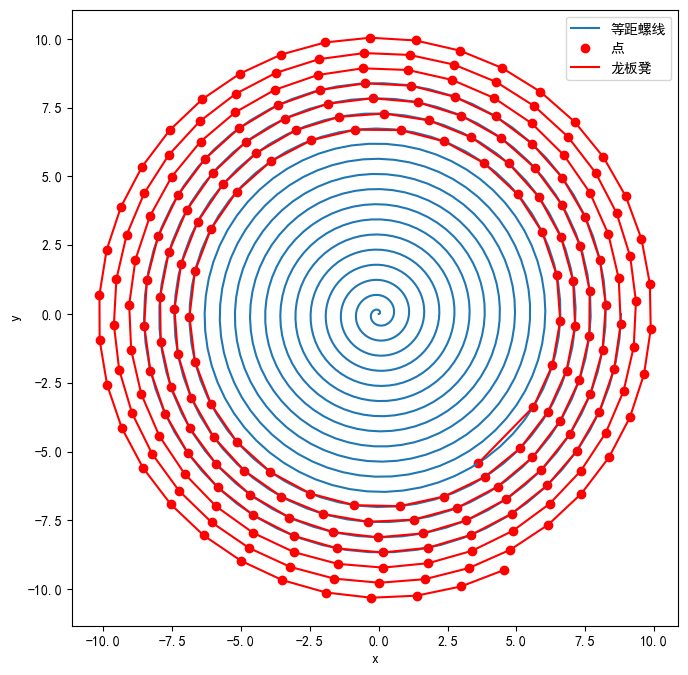

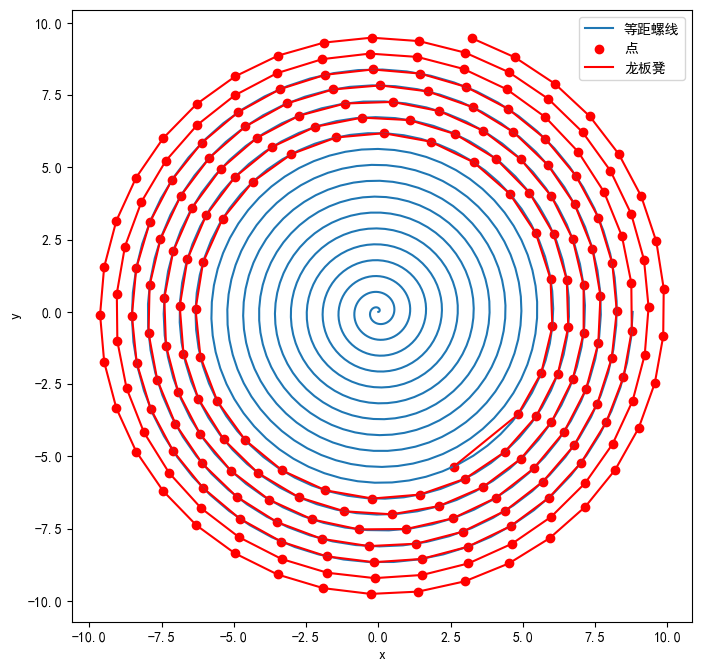

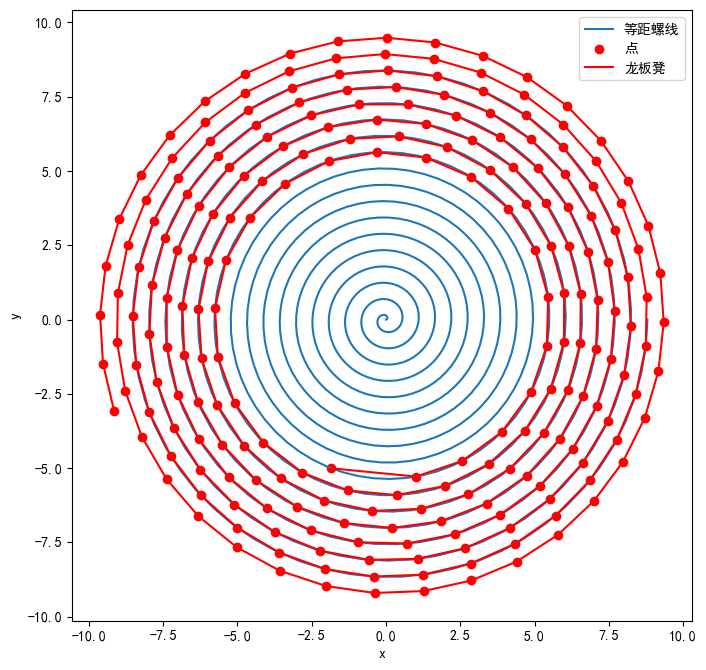

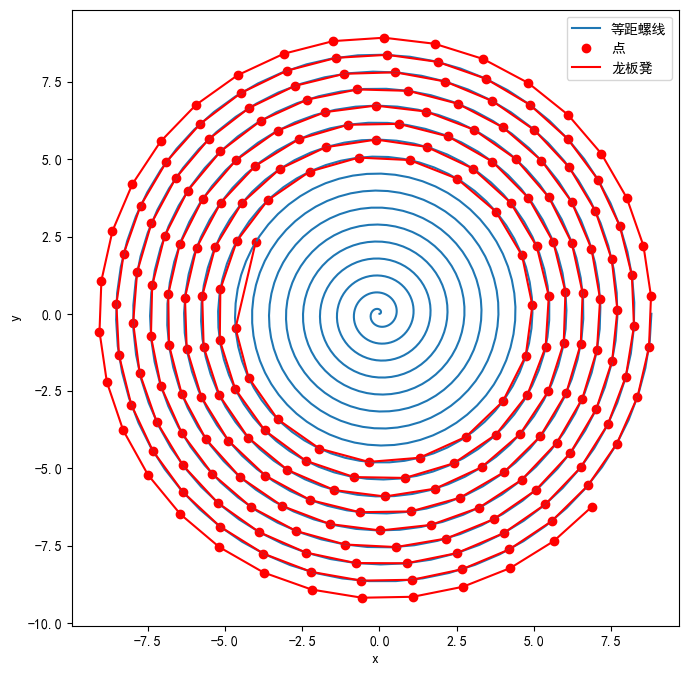

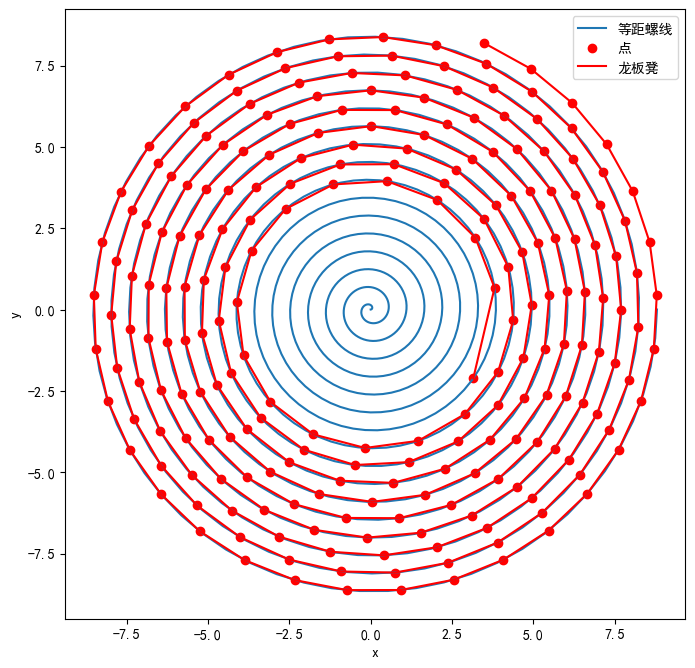

In [19]:
for i in range(10):
    row = points_test.iloc[i*40]
    plot_spiral_with_points_noi(row)

In [20]:
for i in range(223):
    alpha_values = points[[f"alpha_第{i+1}节龙身"]].values
    alpha_values = [x[0] for x in alpha_values]
    x_points = []
    y_points = []
    for  theta_point in alpha_values:
        r_point = a + b * theta_point
        x_point = r_point * np.cos(theta_point)
        y_point = r_point * np.sin(theta_point)
        x_points.append(x_point)
        y_points.append(y_point)
        
    points_x[f"alpha_第{i+1}节龙身x"] = x_points
    points_y[f"alpha_第{i+1}节龙身y"] = y_points
    
    points_values[f"alpha_第{i+1}节龙身"] = list(zip(x_points, y_points))
points_values.to_excel("板凳龙坐标.xlsx")
points_values
points_x.to_excel("板凳龙x坐标.xlsx")
points_x
points_y.to_excel("板凳龙y坐标.xlsx")
points_y

c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

,龙头坐标y,alpha_第1节龙身y,alpha_第2节龙身y,alpha_第3节龙身y,alpha_第4节龙身y,alpha_第5节龙身y,alpha_第6节龙身y,alpha_第7节龙身y,alpha_第8节龙身y,alpha_第9节龙身y,...,alpha_第214节龙身y,alpha_第215节龙身y,alpha_第216节龙身y,alpha_第217节龙身y,alpha_第218节龙身y,alpha_第219节龙身y,alpha_第220节龙身y,alpha_第221节龙身y,alpha_第222节龙身y,alpha_第223节龙身y
0,-3.448605e-14,2.826544,4.340113,5.705314,6.875036,7.809186,8.476005,8.853088,8.928057,8.698901,...,1.679915,0.035223,-1.611865,-3.229324,-4.785802,-6.251226,-7.597374,-8.798409,-9.831368,-10.676584
1,-9.971839e-01,1.860575,3.438678,4.899675,6.192959,7.274013,8.105895,8.660437,8.919130,8.873670,...,2.660455,1.032814,-0.616667,-2.255858,-3.852925,-5.376951,-6.798527,-8.090311,-9.227547,-10.188525
2,-1.980349e+00,0.871813,2.494280,4.032508,5.433023,6.647431,7.634043,8.359256,8.798627,8.937633,...,3.621330,2.022399,0.382301,-1.266953,-2.893276,-4.465124,-5.952106,-7.325564,-8.559119,-9.629166
3,-2.936747e+00,-0.127045,1.518976,3.114818,4.604812,5.937280,7.066296,7.953215,8.567938,8.889869,...,4.555640,2.996892,1.377912,-0.269644,-1.913660,-3.522190,-5.064074,-6.509537,-7.830759,-9.002400
4,-3.853933e+00,-1.123132,0.525261,2.158295,3.718810,5.152492,6.409736,7.447320,8.229841,8.730855,...,5.456662,3.949305,2.363046,0.728961,-0.921039,-2.554829,-4.140701,-5.647971,-7.047572,-8.312600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1.646926e-02,2.798615,2.734422,1.786026,0.263023,-1.366096,-2.623286,-3.157260,-2.830955,-1.743040,...,8.118134,8.374241,8.306115,7.917044,7.222645,6.250133,5.037171,3.630331,2.083242,0.454499
447,-3.449689e-01,1.385027,2.552349,2.876344,2.264385,0.924681,-0.721792,-2.182711,-3.041217,-3.066499,...,7.228731,7.922563,8.308804,8.373079,8.113557,7.540892,6.677692,5.557529,4.223552,2.726757
448,4.600769e-02,-0.286596,0.333496,-0.297425,-0.864115,-1.491248,-0.333972,1.131794,0.617363,-0.922430,...,5.825709,6.796069,7.463683,7.799434,7.789167,7.434141,6.750793,5.769842,4.534783,3.099846
449,6.918055e-01,-2.060770,-1.322449,0.246328,1.731361,2.338941,1.781990,0.353885,-1.275236,-2.393109,...,-7.937441,-7.434408,-6.625134,-5.543349,-4.233651,-2.749588,-1.151394,0.496494,2.128061,3.678362


In [21]:
points_values

,龙头坐标,alpha_第1节龙身,alpha_第2节龙身,alpha_第3节龙身,alpha_第4节龙身,alpha_第5节龙身,alpha_第6节龙身,alpha_第7节龙身,alpha_第8节龙身,alpha_第9节龙身,...,alpha_第214节龙身,alpha_第215节龙身,alpha_第216节龙身,alpha_第217节龙身,alpha_第218节龙身,alpha_第219节龙身,alpha_第220节龙身,alpha_第221节龙身,alpha_第222节龙身,alpha_第223节龙身
0,"(8.8, -3.448605386398947e-14)","(8.363823851392665, 2.8265438909356706)","(7.706853796954709, 4.340112636503945)","(6.780179648838111, 5.705314095337742)","(5.616457183647519, 6.875036294836539)","(4.256359934685793, 7.8091858938603655)","(2.747104585341287, 8.4760054275161)","(1.1407705498281584, 8.853087602037744)","(-0.5075254201955949, 8.928056897044403)","(-2.141535034634457, 8.698900662322927)",...,"(-11.692444212732795, 1.6799146977889265)","(-11.824686796723604, 0.03522266005714078)","(-11.726697840763455, -1.6118651228216403)","(-11.400618920255463, -3.229323789248337)","(-10.853010355570873, -4.785802141132183)","(-10.094701501896315, -6.251226203455871)","(-9.140559626376717, -7.597373773887484)","(-8.009182578936866, -8.798409150770716)","(-6.722521871128986, -9.831368115581325)","(-5.305444039648723, -10.676584312495526)"
1,"(8.733302426176627, -0.9971838526706541)","(8.620099348094858, 1.860574895564237)","(8.138342441686738, 3.4386782771958915)","(7.371538641673406, 4.899675173932598)","(6.346883699516014, 6.192958688674107)","(5.100360033181315, 7.274013150418299)","(3.6754137918296657, 8.105895479385309)","(2.1213920427757276, 8.660437095007968)","(0.49179757972309224, 8.919129742716125)","(-1.1575760664339816, 8.873670141389093)",...,"(-11.50140878143487, 2.660455304634908)","(-11.772120231903266, 1.032814278307493)","(-11.813481063293821, -0.6166672407236735)","(-11.624922018881957, -2.2558577381245097)","(-11.210342024589716, -3.8529248714447086)","(-10.578009632016544, -5.37695103437682)","(-9.740380633971725, -6.798526801486524)","(-8.713836146645296, -8.090311000003943)","(-7.518346936627821, -9.227546924836872)","(-6.17707112427176, -10.188525173907735)"
2,"(8.55383611837242, -1.9803488343056626)","(8.765428990712481, 0.8718132326839985)","(8.46526106784101, 2.4942802487024807)","(7.868305598295215, 4.032507854542643)","(6.995919349303732, 5.433022842880837)","(5.878908233680894, 6.647430586418606)","(4.556374495407593, 7.634043231339852)","(3.074292598701774, 8.359255787385734)","(1.4838671971417443, 8.798626976771759)","(-0.16026704816522133, 8.937632672335319)",...,"(-11.228154566903235, 3.621330305429316)","(-11.63548393029779, 2.0223985402450197)","(-11.815985841374323, 0.38230126870985576)","(-11.766375797945319, -1.266952757687991)","(-11.487855199037622, -2.893275688714603)","(-10.986064933325949, -4.465123814086729)","(-10.27095330731308, -5.952105778449437)","(-9.356561657077497, -7.325564154221516)","(-8.26073253771299, -8.55911939868824)","(-7.0047468200748, -9.629166069206942)"
3,"(8.263798145156374, -2.936746676774618)","(8.797818778277406, -0.1270452756643846)","(8.683302585770958, 1.5189760005173258)","(8.264031419850228, 3.1148180006591604)","(7.555216081343837, 4.604811563023517)","(6.582062990717281, 5.937280347721052)","(5.378807991232504, 7.066296470814278)","(3.9874505241630436, 7.953214955693115)","(2.456236686873943, 8.56793780745998)","(0.8379473274001215, 8.889868776774644)",...,"(-10.874589420256862, 4.555639946701103)","(-11.415703393686757, 2.996891837557847)","(-11.734142394591279, 1.3779117256658027)","(-11.823921681669518, -0.26964394247118)","(-11.683528108745893, -1.9136602576825081)","(-11.31592648464462, -3.5221903462903263)","(-10.728479039936134, -5.064074096676231)","(-9.932780362425321, -6.509537210908793)","(-8.944411769329632, -7.8307591923262665)","(-7.78262059232842, -9.002399606890688)"
4,"(7.866828261599743, -3.8539331794340654)","(8.716724329665068, -1.1231317085308714)","(8.789544141362553, 0.525260621896958)","(8.55353862428763, 2.1582950354655344)","(8.017542286991347, 3.7188103113901256)","(7.200807525300819, 5.152492399244982)","(6.132239346335878, 6.409736228775647)","(4.849305629347168, 7.44732

In [22]:
points_x

,龙头坐标x,alpha_第1节龙身x,alpha_第2节龙身x,alpha_第3节龙身x,alpha_第4节龙身x,alpha_第5节龙身x,alpha_第6节龙身x,alpha_第7节龙身x,alpha_第8节龙身x,alpha_第9节龙身x,...,alpha_第214节龙身x,alpha_第215节龙身x,alpha_第216节龙身x,alpha_第217节龙身x,alpha_第218节龙身x,alpha_第219节龙身x,alpha_第220节龙身x,alpha_第221节龙身x,alpha_第222节龙身x,alpha_第223节龙身x
0,8.800000,8.363824,7.706854,6.780180,5.616457,4.256360,2.747105,1.140771,-0.507525,-2.141535,...,-11.692444,-11.824687,-11.726698,-11.400619,-10.853010,-10.094702,-9.140560,-8.009183,-6.722522,-5.305444
1,8.733302,8.620099,8.138342,7.371539,6.346884,5.100360,3.675414,2.121392,0.491798,-1.157576,...,-11.501409,-11.772120,-11.813481,-11.624922,-11.210342,-10.578010,-9.740381,-8.713836,-7.518347,-6.177071
2,8.553836,8.765429,8.465261,7.868306,6.995919,5.878908,4.556374,3.074293,1.483867,-0.160267,...,-11.228155,-11.635484,-11.815986,-11.766376,-11.487855,-10.986065,-10.270953,-9.356562,-8.260733,-7.004747
3,8.263798,8.797819,8.683303,8.264031,7.555216,6.582063,5.378808,3.987451,2.456237,0.837947,...,-10.874589,-11.415703,-11.734142,-11.823922,-11.683528,-11.315926,-10.728479,-9.932780,-8.944412,-7.782621
4,7.866828,8.716724,8.789544,8.553539,8.017542,7.200808,6.132239,4.849306,3.396666,1.824570,...,-10.443201,-11.114301,-11.568484,-11.797098,-11.795918,-11.565203,-11.109670,-10.438376,-9.564522,-8.505182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,-0.034903,0.627869,-1.020882,-2.371083,-3.005874,-2.744204,-1.675572,-0.114364,1.503049,2.743589,...,2.021903,0.391900,-1.256693,-2.860165,-4.356932,-5.689869,-6.808449,-7.670599,-8.244198,-8.508198
447,0.150697,2.428133,1.262004,-0.355874,-1.888194,-2.851363,-2.959186,-2.192233,-0.783166,0.866640,...,4.162985,2.665956,1.061799,-0.586948,-2.216411,-3.763846,-5.170042,-6.381543,-7.352628,-8.046964
448,-0.555333,0.805455,-0.500520,0.202970,-1.346663,0.179510,1.355611,0.597965,-0.969792,-0.376885,...,5.147675,3.813171,2.304267,0.688788,-0.961180,-2.572532,-4.074376,-5.401115,-6.495248,-7.309776
449,0.046358,0.209100,1.684695,2.196006,1.476857,-0.057206,-1.610365,-2.436814,-2.175159,-0.961543,...,1.766662,3.338112,4.776019,6.021909,7.025499,7.746647,8.156862,8.240324,7.994381,7.429520


In [23]:
points_y

,龙头坐标y,alpha_第1节龙身y,alpha_第2节龙身y,alpha_第3节龙身y,alpha_第4节龙身y,alpha_第5节龙身y,alpha_第6节龙身y,alpha_第7节龙身y,alpha_第8节龙身y,alpha_第9节龙身y,...,alpha_第214节龙身y,alpha_第215节龙身y,alpha_第216节龙身y,alpha_第217节龙身y,alpha_第218节龙身y,alpha_第219节龙身y,alpha_第220节龙身y,alpha_第221节龙身y,alpha_第222节龙身y,alpha_第223节龙身y
0,-3.448605e-14,2.826544,4.340113,5.705314,6.875036,7.809186,8.476005,8.853088,8.928057,8.698901,...,1.679915,0.035223,-1.611865,-3.229324,-4.785802,-6.251226,-7.597374,-8.798409,-9.831368,-10.676584
1,-9.971839e-01,1.860575,3.438678,4.899675,6.192959,7.274013,8.105895,8.660437,8.919130,8.873670,...,2.660455,1.032814,-0.616667,-2.255858,-3.852925,-5.376951,-6.798527,-8.090311,-9.227547,-10.188525
2,-1.980349e+00,0.871813,2.494280,4.032508,5.433023,6.647431,7.634043,8.359256,8.798627,8.937633,...,3.621330,2.022399,0.382301,-1.266953,-2.893276,-4.465124,-5.952106,-7.325564,-8.559119,-9.629166
3,-2.936747e+00,-0.127045,1.518976,3.114818,4.604812,5.937280,7.066296,7.953215,8.567938,8.889869,...,4.555640,2.996892,1.377912,-0.269644,-1.913660,-3.522190,-5.064074,-6.509537,-7.830759,-9.002400
4,-3.853933e+00,-1.123132,0.525261,2.158295,3.718810,5.152492,6.409736,7.447320,8.229841,8.730855,...,5.456662,3.949305,2.363046,0.728961,-0.921039,-2.554829,-4.140701,-5.647971,-7.047572,-8.312600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1.646926e-02,2.798615,2.734422,1.786026,0.263023,-1.366096,-2.623286,-3.157260,-2.830955,-1.743040,...,8.118134,8.374241,8.306115,7.917044,7.222645,6.250133,5.037171,3.630331,2.083242,0.454499
447,-3.449689e-01,1.385027,2.552349,2.876344,2.264385,0.924681,-0.721792,-2.182711,-3.041217,-3.066499,...,7.228731,7.922563,8.308804,8.373079,8.113557,7.540892,6.677692,5.557529,4.223552,2.726757
448,4.600769e-02,-0.286596,0.333496,-0.297425,-0.864115,-1.491248,-0.333972,1.131794,0.617363,-0.922430,...,5.825709,6.796069,7.463683,7.799434,7.789167,7.434141,6.750793,5.769842,4.534783,3.099846
449,6.918055e-01,-2.060770,-1.322449,0.246328,1.731361,2.338941,1.781990,0.353885,-1.275236,-2.393109,...,-7.937441,-7.434408,-6.625134,-5.543349,-4.233651,-2.749588,-1.151394,0.496494,2.128061,3.678362


In [24]:
# i=0
# alpha_values = points[[f"alpha_第{i+1}节龙身"]].values
# x_points = []
# y_points = []
# for  theta_point in alpha_values:
#     r_point = a + b * theta_point
#     x_point = r_point * np.cos(theta_point)
#     y_point = r_point * np.sin(theta_point)
#     x_points.append(x_point)
#     y_points.append(y_point)
# list(zip(x, y))

In [25]:
points_values

,龙头坐标,alpha_第1节龙身,alpha_第2节龙身,alpha_第3节龙身,alpha_第4节龙身,alpha_第5节龙身,alpha_第6节龙身,alpha_第7节龙身,alpha_第8节龙身,alpha_第9节龙身,...,alpha_第214节龙身,alpha_第215节龙身,alpha_第216节龙身,alpha_第217节龙身,alpha_第218节龙身,alpha_第219节龙身,alpha_第220节龙身,alpha_第221节龙身,alpha_第222节龙身,alpha_第223节龙身
0,"(8.8, -3.448605386398947e-14)","(8.363823851392665, 2.8265438909356706)","(7.706853796954709, 4.340112636503945)","(6.780179648838111, 5.705314095337742)","(5.616457183647519, 6.875036294836539)","(4.256359934685793, 7.8091858938603655)","(2.747104585341287, 8.4760054275161)","(1.1407705498281584, 8.853087602037744)","(-0.5075254201955949, 8.928056897044403)","(-2.141535034634457, 8.698900662322927)",...,"(-11.692444212732795, 1.6799146977889265)","(-11.824686796723604, 0.03522266005714078)","(-11.726697840763455, -1.6118651228216403)","(-11.400618920255463, -3.229323789248337)","(-10.853010355570873, -4.785802141132183)","(-10.094701501896315, -6.251226203455871)","(-9.140559626376717, -7.597373773887484)","(-8.009182578936866, -8.798409150770716)","(-6.722521871128986, -9.831368115581325)","(-5.305444039648723, -10.676584312495526)"
1,"(8.733302426176627, -0.9971838526706541)","(8.620099348094858, 1.860574895564237)","(8.138342441686738, 3.4386782771958915)","(7.371538641673406, 4.899675173932598)","(6.346883699516014, 6.192958688674107)","(5.100360033181315, 7.274013150418299)","(3.6754137918296657, 8.105895479385309)","(2.1213920427757276, 8.660437095007968)","(0.49179757972309224, 8.919129742716125)","(-1.1575760664339816, 8.873670141389093)",...,"(-11.50140878143487, 2.660455304634908)","(-11.772120231903266, 1.032814278307493)","(-11.813481063293821, -0.6166672407236735)","(-11.624922018881957, -2.2558577381245097)","(-11.210342024589716, -3.8529248714447086)","(-10.578009632016544, -5.37695103437682)","(-9.740380633971725, -6.798526801486524)","(-8.713836146645296, -8.090311000003943)","(-7.518346936627821, -9.227546924836872)","(-6.17707112427176, -10.188525173907735)"
2,"(8.55383611837242, -1.9803488343056626)","(8.765428990712481, 0.8718132326839985)","(8.46526106784101, 2.4942802487024807)","(7.868305598295215, 4.032507854542643)","(6.995919349303732, 5.433022842880837)","(5.878908233680894, 6.647430586418606)","(4.556374495407593, 7.634043231339852)","(3.074292598701774, 8.359255787385734)","(1.4838671971417443, 8.798626976771759)","(-0.16026704816522133, 8.937632672335319)",...,"(-11.228154566903235, 3.621330305429316)","(-11.63548393029779, 2.0223985402450197)","(-11.815985841374323, 0.38230126870985576)","(-11.766375797945319, -1.266952757687991)","(-11.487855199037622, -2.893275688714603)","(-10.986064933325949, -4.465123814086729)","(-10.27095330731308, -5.952105778449437)","(-9.356561657077497, -7.325564154221516)","(-8.26073253771299, -8.55911939868824)","(-7.0047468200748, -9.629166069206942)"
3,"(8.263798145156374, -2.936746676774618)","(8.797818778277406, -0.1270452756643846)","(8.683302585770958, 1.5189760005173258)","(8.264031419850228, 3.1148180006591604)","(7.555216081343837, 4.604811563023517)","(6.582062990717281, 5.937280347721052)","(5.378807991232504, 7.066296470814278)","(3.9874505241630436, 7.953214955693115)","(2.456236686873943, 8.56793780745998)","(0.8379473274001215, 8.889868776774644)",...,"(-10.874589420256862, 4.555639946701103)","(-11.415703393686757, 2.996891837557847)","(-11.734142394591279, 1.3779117256658027)","(-11.823921681669518, -0.26964394247118)","(-11.683528108745893, -1.9136602576825081)","(-11.31592648464462, -3.5221903462903263)","(-10.728479039936134, -5.064074096676231)","(-9.932780362425321, -6.509537210908793)","(-8.944411769329632, -7.8307591923262665)","(-7.78262059232842, -9.002399606890688)"
4,"(7.866828261599743, -3.8539331794340654)","(8.716724329665068, -1.1231317085308714)","(8.789544141362553, 0.525260621896958)","(8.55353862428763, 2.1582950354655344)","(8.017542286991347, 3.7188103113901256)","(7.200807525300819, 5.152492399244982)","(6.132239346335878, 6.409736228775647)","(4.849305629347168, 7.44732

In [26]:
import math

def calculate_distance(point1, point2):
    """
    计算二维平面上两个点之间的欧几里得距离。
    
    参数:
    point1 (tuple): 第一个点的坐标 (x1, y1)。
    point2 (tuple): 第二个点的坐标 (x2, y2)。
    
    返回:
    float: 两点之间的距离。
    """
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

In [27]:
 p = points_values["alpha_第222节龙身"].values

In [28]:
volict_names = ['龙头速度', '第1节龙身速度', '第2节龙身速度', '第3节龙身速度', '第4节龙身速度', '第5节龙身速度', '第6节龙身速度', '第7节龙身速度', '第8节龙身速度', '第9节龙身速度', '第10节龙身速度', '第11节龙身速度', '第12节龙身速度', '第13节龙身速度', '第14节龙身速度', '第15节龙身速度', '第16节龙身速度', '第17节龙身速度', '第18节龙身速度', '第19节龙身速度', '第20节龙身速度', '第21节龙身速度', '第22节龙身速度', '第23节龙身速度', '第24节龙身速度', '第25节龙身速度', '第26节龙身速度', '第27节龙身速度', '第28节龙身速度', '第29节龙身速度', '第30节龙身速度', '第31节龙身速度', '第32节龙身速度', '第33节龙身速度', '第34节龙身速度', '第35节龙身速度', '第36节龙身速度', '第37节龙身速度', '第38节龙身速度', '第39节龙身速度', '第40节龙身速度', '第41节龙身速度', '第42节龙身速度', '第43节龙身速度', '第44节龙身速度', '第45节龙身速度', '第46节龙身速度', '第47节龙身速度', '第48节龙身速度', '第49节龙身速度', '第50节龙身速度', '第51节龙身速度', '第52节龙身速度', '第53节龙身速度', '第54节龙身速度', '第55节龙身速度', '第56节龙身速度', '第57节龙身速度', '第58节龙身速度', '第59节龙身速度', '第60节龙身速度', '第61节龙身速度', '第62节龙身速度', '第63节龙身速度', '第64节龙身速度', '第65节龙身速度', '第66节龙身速度', '第67节龙身速度', '第68节龙身速度', '第69节龙身速度', '第70节龙身速度', '第71节龙身速度', '第72节龙身速度', '第73节龙身速度', '第74节龙身速度', '第75节龙身速度', '第76节龙身速度', '第77节龙身速度', '第78节龙身速度', '第79节龙身速度', '第80节龙身速度', '第81节龙身速度', '第82节龙身速度', '第83节龙身速度', '第84节龙身速度', '第85节龙身速度', '第86节龙身速度', '第87节龙身速度', '第88节龙身速度', '第89节龙身速度', '第90节龙身速度', '第91节龙身速度', '第92节龙身速度', '第93节龙身速度', '第94节龙身速度', '第95节龙身速度', '第96节龙身速度', '第97节龙身速度', '第98节龙身速度', '第99节龙身速度', '第100节龙身速度', '第101节龙身速度', '第102节龙身速度', '第103节龙身速度', '第104节龙身速度', '第105节龙身速度', '第106节龙身速度', '第107节龙身速度', '第108节龙身速度', '第109节龙身速度', '第110节龙身速度', '第111节龙身速度', '第112节龙身速度', '第113节龙身速度', '第114节龙身速度', '第115节龙身速度', '第116节龙身速度', '第117节龙身速度', '第118节龙身速度', '第119节龙身速度', '第120节龙身速度', '第121节龙身速度', '第122节龙身速度', '第123节龙身速度', '第124节龙身速度', '第125节龙身速度', '第126节龙身速度', '第127节龙身速度', '第128节龙身速度', '第129节龙身速度', '第130节龙身速度', '第131节龙身速度', '第132节龙身速度', '第133节龙身速度', '第134节龙身速度', '第135节龙身速度', '第136节龙身速度', '第137节龙身速度', '第138节龙身速度', '第139节龙身速度', '第140节龙身速度', '第141节龙身速度', '第142节龙身速度', '第143节龙身速度', '第144节龙身速度', '第145节龙身速度', '第146节龙身速度', '第147节龙身速度', '第148节龙身速度', '第149节龙身速度', '第150节龙身速度', '第151节龙身速度', '第152节龙身速度', '第153节龙身速度', '第154节龙身速度', '第155节龙身速度', '第156节龙身速度', '第157节龙身速度', '第158节龙身速度', '第159节龙身速度', '第160节龙身速度', '第161节龙身速度', '第162节龙身速度', '第163节龙身速度', '第164节龙身速度', '第165节龙身速度', '第166节龙身速度', '第167节龙身速度', '第168节龙身速度', '第169节龙身速度', '第170节龙身速度', '第171节龙身速度', '第172节龙身速度', '第173节龙身速度', '第174节龙身速度', '第175节龙身速度', '第176节龙身速度', '第177节龙身速度', '第178节龙身速度', '第179节龙身速度', '第180节龙身速度', '第181节龙身速度', '第182节龙身速度', '第183节龙身速度', '第184节龙身速度', '第185节龙身速度', '第186节龙身速度', '第187节龙身速度', '第188节龙身速度', '第189节龙身速度', '第190节龙身速度', '第191节龙身速度', '第192节龙身速度', '第193节龙身速度', '第194节龙身速度', '第195节龙身速度', '第196节龙身速度', '第197节龙身速度', '第198节龙身速度', '第199节龙身速度', '第200节龙身速度', '第201节龙身速度', '第202节龙身速度', '第203节龙身速度', '第204节龙身速度', '第205节龙身速度', '第206节龙身速度', '第207节龙身速度', '第208节龙身速度', '第209节龙身速度', '第210节龙身速度', '第211节龙身速度', '第212节龙身速度', '第213节龙身速度', '第214节龙身速度', '第215节龙身速度', '第216节龙身速度', '第217节龙身速度', '第218节龙身速度', '第219节龙身速度', '第220节龙身速度', '第221节龙身速度', '第222节龙身速度']

In [ ]:
print(points_names)

In [32]:
volicts_point = pd.DataFrame(columns=volict_names)
for j in range(points_values.shape[1]-1):
    point_2 = points_values[points_names[j]]
    volicts = []
    for i in range(len(point_2)-1):
        volict_1 = calculate_distance(point_2[i],point_2[i+1])
        volicts.append(volict_1)
    volicts_point[volict_names[j]] = volicts

In [33]:
# j = 0
# point_2 = points_values[points_names[j]]
# volicts = []
# for i in range(len(point_2)-1):
#     volict_1 = calculate_distance(point_2[i],point_2[i+1])
#     volicts.append(volict_1)
# volicts_point[volict_names[j]] = volicts

In [ ]:
volicts_point.to_excel("速度.xlsx")

In [ ]:
for i in range(5):
    j = i*10 + 180
    # 创建一个新的图形和子图
    plt.figure(figsize=(6, 6))


    # 绘制散点图
    plt.scatter(points_x[f"alpha_第{j}节龙身x"],points_y[f"alpha_第{j}节龙身y"], color='blue', label='Scatter Points')

    # 绘制曲线图
    plt.plot(points_x[f"alpha_第{j}节龙身x"],points_y[f"alpha_第{j}节龙身y"], color='red', label='Curve')

    # 添加标题和标签
#     plt.title("Scatter Plot and Curve on the Same Subplot")
    plt.xlabel("X values")
    plt.ylabel("Y values")

    # 显示图例
    plt.legend()
    plt.title(f"alpha_第{j}节龙身位置变化")
    # 显示图像
    plt.show()

In [ ]:
for i in range(20):
    
    j = i + 430
    # 提取数据
    pointsx = points_x.loc[j].values
    pointsy = points_y.loc[j].values

    # 创建一个新的图形和子图
    plt.figure(figsize=(6, 6))
    

    # 绘制散点图
    plt.scatter(pointsx, pointsy, color='blue', label='Scatter Points')

    # 绘制曲线图
    plt.plot(pointsx, pointsy, color='red', label='Curve')

    # 添加标题和标签
    plt.title(f"龙板凳{j}时间的位置")
    plt.xlabel("X values")
    plt.ylabel("Y values")

    # 显示图例
    plt.legend()

    # 显示图像
    plt.show()